<center>

# Assignment 1

## Alejandra Torres, Ricardo Cano

<center>

$(\textit{50 Points})$ Write a code in any programming language to solve the following problems:

# First point.

$(\textbf{10 Points})$ Collect statistics on the number of components in state of art integrated circuits over the years. Plot the number of components as a function of time and compare the growth to that dictated by Moore’s law. Do the same for the peak FLOPS rate of processors and compare the speed to that inferred Moore’s law.

## Answer 

$\textbf{1.1. }$The Moore's law said that the number of the transistors in a microprocessors doubles every two years, and the number of mathematical operations per second is growing too while this happens. So, in this way, we take de data from the next link: https://github.com/karlrupp/microprocessor-trend-data/tree/master/40yrs. The first is the number of transistor per year, and the second is frecuency. With them we can see that the number of transistors in a dense integrated circuit grow over the years. Finally, the both data plots fit with an exponential function.

In [18]:
import numpy as np
import scipy as sp
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

In [19]:
t=np.loadtxt("Transistors.txt")
f=np.loadtxt("frequency.txt")

In [20]:
years1 = t[:,0]
data1 = t[:,1]

In [21]:
def func(x, a, b):
    return np.exp(b * (x-a)) 

In [22]:
popt, pcov = curve_fit(func, years1, data1, p0=[1970,1])

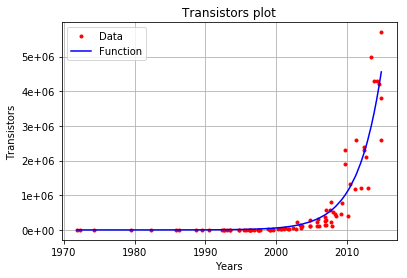

In [23]:
plt.plot(years1,data1,".",color='r',label='Transistors')
plt.plot(years1, func(years1,*popt), 'r-', color='blue') 
plt.grid()
plt.legend(('Data', 'Function'),
prop = {'size':10}, loc = 'best')
plt.xlabel('Years')
plt.ylabel('Transistors')
plt.title('Transistors plot')
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0e'))
plt.show()

In [24]:
years2 = f[:,0]
data2 = f[:,1]

In [25]:
def func1(x, a, b):
    return a*x+b 

In [26]:
popt, pcov = curve_fit(func1, years2,np.log(data2),p0=[1,1970])

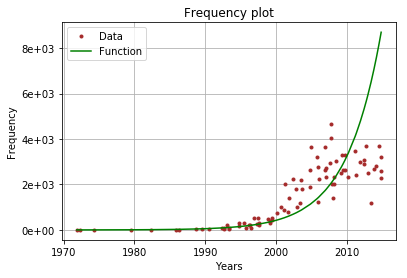

In [27]:
plt.plot(years2,data2,".",color='brown',label='Transistors')
plt.plot(years2, np.exp(func1(years2,*popt)), 'r-', color='green') 
plt.grid()
plt.legend(('Data', 'Function'),
prop = {'size':10}, loc = 'best')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.title('Frequency plot')
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0e'))
plt.show()

For both graphs we can see that all data effectively over the years, describe exponential growth, this is known due to the trend line that adjusts the data. This growth tells us that the capacity of the components that are built has been growing, leading to increasingly high performance computing, where processors are more efficient and memories have more processing capacity. 

Another way to measure the power of a computer, for example, is by the electric power consumed by CPUs and GPUs (and thus the heat generated) increases in good approximation with the cubic power of clock frequency.

$\textbf{1.2.}$ The data for the following plots were taken from: https://github.com/karlrupp/cpu-gpu-mic-comparison. We are going to make a comparison between GFLOPs, memory and Frequency, between differents processors of different brands.

Finally, the speed of a computer is measured by FLOPs (Floating Point Operations Per Second), that gives the number of computer floating operations per second. A FLOP is a measure of performance, and they are known as megaflop, gigaflop, teraflop. In the next plots we can see the comparition between diferent CPUs through the flops per second and the number of cores of each one. From 2007 to 2016.

In [28]:
dataAMD = pd.read_csv('data-amd.txt',sep=';', header = None,names=['Year','GFLOPs-SP','GFLOPs-DP','Pixel-Shader','Mem-BW','TDP','CUs','Freq(MHz)','Name'])
dataINTELPHI = pd.read_csv('data-intel-phi.txt',sep=';', header = None,names=['Year','GFLOPs-SP','GFLOPs-DP','Cores','Mem-BW/Socket','TDP','Freq(MHz)','Name'])
dataINTEL = pd.read_csv('data-intel.txt',sep=';', header = None,names=['Year','GFLOPs-SP','GFLOPs-DP','Cores','Mem-BW/Socket','TDP','Freq(MHz)','Name'])
dataNDIVIA = pd.read_csv('data-sp-nvidia.txt',sep=';', header = None,names=['Year','GFLOPs-SP','Pixel-Shader','Mem-BW/Socket','TDP','CUs','Freq(MHz)','Name'])

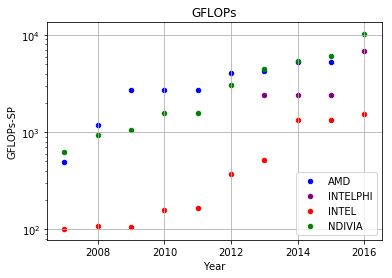

In [29]:
ax = plt.gca()
dataAMD.plot(kind='scatter',x='Year',y='GFLOPs-SP',title='GFLOPs', logy=True,label='AMD', color='blue', ax=ax)
dataINTELPHI.plot(kind='scatter',x='Year',y='GFLOPs-SP',title='GFLOPs' , logy=True,label='INTELPHI', color='purple', ax=ax)
dataINTEL.plot(kind='scatter',x='Year',y='GFLOPs-SP',title='GFLOPs' , logy=True,label='INTEL' , color='red', ax=ax)
dataNDIVIA.plot(kind='scatter',x='Year',y='GFLOPs-SP',title='GFLOPs' , logy=True,label= 'NDIVIA', color='green', ax=ax)
plt.grid()
plt.show()

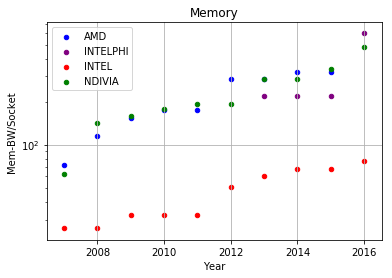

In [30]:
ax = plt.gca()
dataAMD.plot(kind='scatter',x='Year',y='Mem-BW',title='Memory', logy=True,label='AMD', color='blue', ax=ax)
dataINTELPHI.plot(kind='scatter',x='Year',y='Mem-BW/Socket',title='Memory', logy=True,label='INTELPHI', color='purple', ax=ax)
dataINTEL.plot(kind='scatter',x='Year',y='Mem-BW/Socket',title='Memory', logy=True,label='INTEL' , color='red', ax=ax)
dataNDIVIA.plot(kind='scatter',x='Year',y='Mem-BW/Socket',title='Memory', logy=True,label= 'NDIVIA', color='green', ax=ax)
plt.grid()
plt.show()

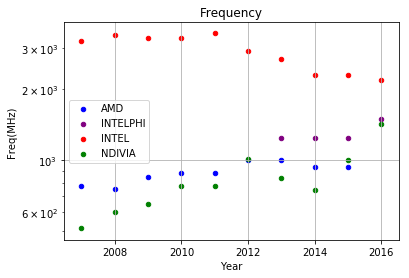

In [31]:
ax = plt.gca()
dataAMD.plot(kind='scatter',x='Year',y='Freq(MHz)', title='Frequency', logy=True, label='AMD', color='blue', ax=ax)
dataINTELPHI.plot(kind='scatter',x='Year',y='Freq(MHz)', title='Frequency', logy=True, label='INTELPHI', color='purple', ax=ax)
dataINTEL.plot(kind='scatter',x='Year',y='Freq(MHz)', title='Frequency', logy=True, label='INTEL' , color='red', ax=ax)
dataNDIVIA.plot(kind='scatter',x='Year',y='Freq(MHz)', title='Frequency', logy=True, label= 'NDIVIA', color='green', ax=ax)
plt.grid()
plt.show()

In short, over the years the machines have become more powerful, and according to Moore's law, the capacity of each machine is improving more and more, making the circuits that are designed more complex (much more efficient). Each time the construction of these components is becoming much more powerful and above all more economical, since the growth in the manufacture of transistors has also been increasing, and not only in quantity but also in capacity, which means that the design and production of these components are assembled and brought to market in less time.

# Second point.

$\textit{(40 Points)}$ We are going to solve numerically the $2D$ Laplace’s equation

$$\nabla^2\Phi=0, $$
     where $\Phi$ is a scalar function, as follows.
     
   

   (a) ($\textbf{10 Points})$. Show that we can discretize the two dimensional space into square grids with spacing $h$ in both $x$ and $y$ directions to get,
   
   $$\Phi(x,y)\approx\dfrac{\Phi(x+h,y)+\Phi(x-h,y)+\Phi(x,y+h)+\Phi(x,y-h)}{4} $$
   
which interestingly results to be the spatial average of $\Phi (x, y)$ around a particular point in the domain. Therefore we can numerically compute
   
   $$\Phi_{n+1}(x,y)=\dfrac{\Phi_n(x+h,y)+\Phi_n(x-h,y)+\Phi_n(x,y+h)+\Phi_n(x,y-h)}{4}, $$
where $\Phi_n(x, y)$ is the value of the scalar function at the nth iteration step. As the iteration proceeds (as $n$ is increased), $\Phi (x, y)$ approaches the correct solution of the Laplace’s equation.

## Answer

$\textbf{2.}$  To show the part $\textit{(a).}$  we have to consider the centered differences formula of order $\textit{O}(h^2)$ gives by

$$f^{''}(x)=\dfrac{f(x+h)-2f(x)+f(x-h)}{h^2}+\textit{O}(h^2).$$

Then appliying the formula to the equation $\nabla^2 \Phi=0$ we have

$$\nabla^2 \Phi=\dfrac{\Phi(x+h,y)-2\Phi(x,y)+\Phi(x-h,y)+\Phi(x,y+h)-2\Phi(x,y)+\Phi(x,y+h)}{h^2}+\textit{O}(h^2).$$

Now, we will assume that we get the function values on the border of the plane rectangular surface $R$ gives by

$$R=\left\{(x,y): 0\leq x\leq a, 0\leq y\leq b\right\},$$ 

and we will divide the region in $(n-1)x(m-1)$ squeres side $h$.

Let the Laplace function aproximation

$$\dfrac{\Phi(x+h,y)-2\Phi(x,y)+\Phi(x-h,y)+\Phi(x,y+h)-2\Phi(x,y)+\Phi(x,y+h)}{h^2}=0,$$

with precision order $\textit{O}(h^2)$ in the interior points of the grill, where the points are defined as follows:

<ul>
    <li> $x_{i+1}=x_{i}+h,$</li>
    <li> $x_{i-1}=x_{i}-h,$ </li>
    <li> $y_{j+1}=y_{j}+h,$ </li>
    <li> $y_{j-1}=y_{j}-h.$</li>
</ul>

Finally, the approximation is

$$\nabla^2 \Phi (x_i,y_j)=\dfrac{\Phi(x_{i+1},y)+\Phi(x_{i-1},y)+\Phi(x,y_{j+1})+\Phi(x,y_{j-1})-4\Phi(x_i,y_j)}{h^2}+\textit{O}(h^2).$$

It is known as $\textit{"Five Points Differences Formula"}$. This formula gives the realtion between $\Phi (x_i,y_j)$ and its adjacent values.

$\textit{It was taken from "Métodos Numéricos con MATLAB,}$ $3^{a}$ $\textit{edición, John H. Mathews-Kurtis D. Fink."}$

(b) $\textbf{(30 Points)}$. Find the solution of $\nabla^2\Phi=0$ taking a rectangular box $(−1 \leq x \leq 1$ and $−1 \leq y \leq 1)$. Use a grid size of $h = 0.1$ and start the iteration with $\Phi(x, y) = 0.1$ for all grid points except at the boundary where the boundary condition is $\Phi(1, y) = \Phi(−1, y) = \Phi(x, −1) = \Phi(x, −1) = 0$ is imposed, and at the points $(−0.5, 0)$ and $(0.5, 0)$ the surface of it has the following constant values

$$ \Phi(-0.5,0)=-1,$$
$$ \Phi(0.5,0) = 0.$$


Present a table which has $x$ at first column $(x = 0.1, 0.2, \cdots , 1.0)$, $\Phi(x, 0)$ after $100$ iterations at the second column, and after $1000$ iterations at the last column. Make your decision on when to stop iteration to get reliable results and explain it.

## Answer

The numerical method has the next iterative representation

$$\Phi_{i,j}=\Phi_{i,j}+t_{i,j},$$

where $r_{i,j}$ is the residual term and has the following form

$$r_{i,j}=\dfrac{\Phi_{i+1,j}+\Phi_{i-1,j}+\Phi_{i,j+1}+\Phi_{i,j-1}-4\Phi_{i,j}}{4}.$$

The number of iterations is given by the condition $|r_{i,j}|<\epsilon$, where $\epsilon$ is a fix tolerance. In our case we are going to take $\epsilon=0.01$, and the number of iteration was $6$.

In [32]:
def init_matrix(x1,x2,y1,y2,h,x0,y0):
    a=int((x2-x1)/h)
    b=int((y2-y1)/h)
    c=int(x0/h)
    d=int(y0/h)
    M=np.zeros((a,b))
    for  i in range(1,a-1,1):
        for j in range(1,b-1,1):
            M[i][j]=0.1
    M[int(a/2.0)+c][0]=0.0
    M[int(a/2.0)+d][0]=-1.0
    return M

def method(x1,x2,y1,y2,x0,y0,x,y,h,iterations):
    M=init_matrix(x1,x2,y1,y2,h,x0,y0)
    numrows = len(M)   
    numcols = len(M[0])
    #print((numrows*numcols))
    r=10
    epsilon=0.01
    t=0
    condition=0
    while(t<=iterations and condition<400):
            for i in range(int(x/h),numrows-1,1):
                for j in range(int(y/h),numcols-1,1):
                    if(i==0 or i==numrows-1 or j==0 or j==numcols-1):
                        if(i==0 and (j!=0 and j!=(numcols-1))):
                            r=(1.0/1.4)*(M[i+1][j]+M[i-1][j]+M[i][j+1]-4*M[i][j])
                            M[i][j]=M[i][j]+r
                        elif(i==0 and j==0):
                            r=(1.0/1.4)*(M[i+1][j]+M[i][j+1]-4*M[i][j])
                            M[i][j]=M[i][j]+r
                        elif(i==0 and j==(numcols-1)):
                            r=(1.0/1.4)*(M[i-1][j]+M[i][j+1]-4*M[i][j])
                            M[i][j]=M[i][j]+r
                        if(i==numrows-1 and (j!=0 or j!=(numcols-1))):
                            r=(1.0/1.4)*(M[i+1][j]+M[i-1][j]+M[i][j-1]-4*M[i][j])
                            M[i][j]=M[i][j]+r
                        elif(i==numrows-1 and j==0):
                            r=(1.0/1.4)*(M[i-1][j]+M[i][j+1]-4*M[i][j])
                            M[i][j]=M[i][j]+r
                        elif(i==numrows-1 and j==(numcols-1)):
                            r=(1.0/1.4)*(M[i-1][j]+M[i][j-1]-4*M[i][j])
                            M[i][j]=M[i][j]+r
                        if(j==0 and (i!=0 or i!=(numrows-1))):
                            r=(1.0/1.4)*(M[i+1][j]+M[i-1][j]+M[i][j+1]-4*M[i][j])
                            M[i][j]=M[i][j]+r
                        elif(j==numcols-1 and (i!=0 and i!=(numrows-1))):
                            r=(1.0/1.4)*(M[i+1][j]+M[i-1][j]+M[i][j-1]-4*M[i][j])
                            M[i][j]=M[i][j]+r
                    else:
                        r=(1.0/1.4)*(M[i+1][j]+M[i-1][j]+M[i][j+1]+M[i][j-1]-4*M[i][j])
                        M[i][j]=M[i][j]+r
                    if(r<epsilon):
                            condition=condition+1

            for i in range(0,numrows-1,1):
                for j in range(0,numcols-1,1):
                    if(i!=int(x/h) and j!=int(y/h)):
                        if(i==0 or i==numrows-1 or j==0 or j==numcols-1):
                            if(i==0 and (j!=0 and j!=(numcols-1))):
                                r=(1.0/1.4)*(M[i+1][j]+M[i-1][j]+M[i][j+1]-4*M[i][j])
                                M[i][j]=M[i][j]+r
                            elif(i==0 and j==0):
                                r=(1.0/1.4)*(M[i+1][j]+M[i][j+1]-4*M[i][j])
                                M[i][j]=M[i][j]+r
                            elif(i==0 and j==(numcols-1)):
                                r=(1.0/1.4)*(M[i-1][j]+M[i][j+1]-4*M[i][j])
                                M[i][j]=M[i][j]+r
                            if(i==numrows-1 and (j!=0 and j!=(numcols-1))):
                                r=(1.0/1.4)*(M[i+1][j]+M[i-1][j]+M[i][j-1]-4*M[i][j])
                                M[i][j]=M[i][j]+r
                            elif(i==numrows-1 and j==0):
                                r=(1.0/1.4)*(M[i-1][j]+M[i][j+1]-4*M[i][j])
                                M[i][j]=M[i][j]+r
                            elif(i==numrows-1 and j==(numcols-1)):
                                r=(1.0/1.4)*(M[i-1][j]+M[i][j-1]-4*M[i][j])
                                M[i][j]=M[i][j]+r
                            if(j==0 and (i!=0 and i!=(numrows-1))):
                                r=(1.0/1.4)*(M[i+1][j]+M[i-1][j]+M[i][j+1]-4*M[i][j])
                                M[i][j]=M[i][j]+r
                            elif(j==numcols-1 and (i!=0 or i!=(numrows-1))):
                                r=(1.0/1.4)*(M[i+1][j]+M[i-1][j]+M[i][j-1]-4*M[i][j])
                                M[i][j]=M[i][j]+r
                        else:
                            r=(1.0/1.4)*(M[i+1][j]+M[i-1][j]+M[i][j+1]+M[i][j-1]-4*M[i][j])
                            M[i][j]=M[i][j]+r
                        if(r<epsilon):
                            condition=condition+1
                    else:
                        break
            t=t+1
    #print (t,condition)
    return M
    
N=method(-1.0,1.0,-1.0,1.0,0.5,-0.5,0.2,0.0,0.1,100)

#print(N)

$\textbf{(Bonus: 10 Points) Show}$ $\Phi (x, y)$ $\textbf{in a three-dimensional plot}$ $(x, y, \Phi(x, y)).$

## Answer

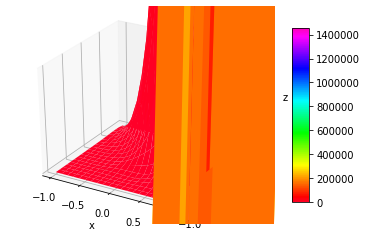

In [33]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-1, 1, 0.1)
Y = np.arange(-1, 1, 0.1)
X, Y = np.meshgrid(X, Y)
Z= N

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.gist_rainbow, linewidth=1, antialiased=True)

# Customize the z axis.
ax.set_zlim(0, 10000)
ax.set_xlabel("x"); ax.set_ylabel("y"); ax.set_zlabel("z")
ax.zaxis.set_major_locator(LinearLocator(1))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.1f'))

# Add a color bar which maps values to colors.

fig.colorbar(surf, shrink=0.8, aspect=10)

plt.show()

## Remark: 
adjoint is an image from another angle of this plot.